### Analyzing, visualizing and predicting local states in a localization problem
### Part-5: Predicting the list of Q3 (or the 3rd quantiles or 75th percentiles) of the local states
In this notebook, similar to the previous notebooks ([Part-3](https://github.com/helalme/UncertaintiesReductionInLocalization/blob/master/2.%20TrainingAndPredictionOfQ1.ipynb) and [Part-4](https://github.com/helalme/UncertaintiesReductionInLocalization/blob/master/3.%20TrainingAndPredictionOfQ2.ipynb)), we will use bidirectionl LSTM network for the prediction of Q3 at different timesteps of a localization problem.

#### Import necessary packages

In [2]:
#!pip install tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


#### Loading the series of datasets

In [4]:
series = np.loadtxt('Data/Q3-13to2000grains.txt')
series

array([[ -48.61067708,  -74.66260417,  -93.34625   , -107.29878125,
        -118.22395833, -126.83302604, -133.741625  , -139.40916667,
        -143.81370833, -147.49069375, -112.00625   ,  -75.90866667,
         -39.38328125,   -2.47239583,   34.78260417,   72.26885208,
         109.954375  ,  147.89276042,  185.87783333,  223.92604167],
       [ -23.1966    ,  -36.6631    ,  -47.8539    ,  -57.74795   ,
         -66.6879    ,  -74.45775   ,  -80.93635   ,  -86.6551    ,
         -91.92235   ,  -96.6056    ,  -62.48275   ,  -27.9119    ,
           7.11988   ,   42.4612    ,   78.1524    ,  113.943     ,
         149.9925    ,  186.146     ,  222.5095    ,  258.996     ],
       [ -15.92675   ,  -24.4565625 ,  -31.9065625 ,  -38.25      ,
         -43.8328125 ,  -48.9578125 ,  -54.1303125 ,  -59.3140625 ,
         -64.255     ,  -68.661875  ,  -34.12125   ,    0.70729687,
          35.715625  ,   70.84125   ,  105.8884375 ,  141.0471875 ,
         176.259375  ,  211.5       ,  246.825

#### Visualization of the training series

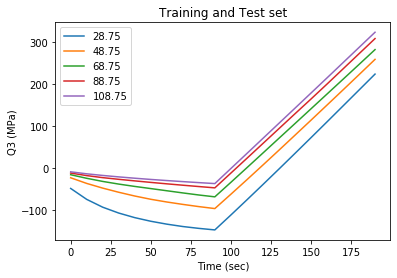

In [5]:
time=range(0,200,10)
plt.plot(time, series[0],  label='28.75')
plt.plot(time, series[1],  label='48.75')
plt.plot(time, series[2],  label='68.75')
plt.plot(time, series[3],  label='88.75')
plt.plot(time, series[4],  label='108.75')

plt.xlabel('Time (sec)')
plt.ylabel('Q3 (MPa)')
plt.title('Training and Test set')
plt.legend()

plt.show()

#### Start the training with 6 data series, 2-to-1, 2L bidirection LSTM network

In [24]:
Xtrain1=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]],[series[3],series[4]]])
Ytrain1 = np.array([series[2],series[3],series[4],series[5]])
print(Xtrain1)
print(Ytrain1)

[[[ -48.61067708  -74.66260417  -93.34625    -107.29878125 -118.22395833
   -126.83302604 -133.741625   -139.40916667 -143.81370833 -147.49069375
   -112.00625     -75.90866667  -39.38328125   -2.47239583   34.78260417
     72.26885208  109.954375    147.89276042  185.87783333  223.92604167]
  [ -23.1966      -36.6631      -47.8539      -57.74795     -66.6879
    -74.45775     -80.93635     -86.6551      -91.92235     -96.6056
    -62.48275     -27.9119        7.11988      42.4612       78.1524
    113.943       149.9925      186.146       222.5095      258.996     ]]

 [[ -23.1966      -36.6631      -47.8539      -57.74795     -66.6879
    -74.45775     -80.93635     -86.6551      -91.92235     -96.6056
    -62.48275     -27.9119        7.11988      42.4612       78.1524
    113.943       149.9925      186.146       222.5095      258.996     ]
  [ -15.92675     -24.4565625   -31.9065625   -38.25        -43.8328125
    -48.9578125   -54.1303125   -59.3140625   -64.255       -68.661875


In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12   ): #and logs.get('val_loss')<1
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu',  return_sequences=True, input_shape=(2, 20))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu')),  #
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain1, Ytrain1, epochs=1000, callbacks=[callbacks]) #, validation_data=(Xtest, Ytest)

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 3s 850ms/sample - loss: 17482.0645
Epoch 2/1000
4/4 [==============================] - 0s 0s/sample - loss: 14774.8359
Epoch 3/1000
4/4 [==============================] - 0s 3ms/sample - loss: 7365.0039
Epoch 4/1000
4/4 [==============================] - 0s 3ms/sample - loss: 6176.8662
Epoch 5/1000
4/4 [==============================] - 0s 5ms/sample - loss: 1237.3279
Epoch 6/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1537.3721
Epoch 7/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1487.0498
Epoch 8/1000
4/4 [==============================] - 0s 3ms/sample - loss: 2043.3112
Epoch 9/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1033.3513
Epoch 10/1000
4/4 [==============================] - 0s 3ms/sample - loss: 972.1362
Epoch 11/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1028.0668
Epoch 12/1000
4/4 [==============================] - 

Epoch 100/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.4255
Epoch 101/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.4078
Epoch 102/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.3548
Epoch 103/1000
4/4 [==============================] - 0s 4ms/sample - loss: 1.3142
Epoch 104/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.2782
Epoch 105/1000
4/4 [==============================] - 0s 4ms/sample - loss: 1.2419
Epoch 106/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.2255
Epoch 107/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.1947
Epoch 108/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.1814
Epoch 109/1000
4/4 [==============================] - 0s 3ms/sample - loss: 1.1481
Epoch 110/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.1341
Epoch 111/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.0979
Epoc

Epoch 199/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4720
Epoch 200/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4673
Epoch 201/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4640
Epoch 202/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4609
Epoch 203/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.4569
Epoch 204/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4523
Epoch 205/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4482
Epoch 206/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4450
Epoch 207/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.4418
Epoch 208/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.4381
Epoch 209/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.4341
Epoch 210/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4303
Epoc

Epoch 298/1000
4/4 [==============================] - 0s 3ms/sample - loss: 18.3809
Epoch 299/1000
4/4 [==============================] - 0s 3ms/sample - loss: 19.1104
Epoch 300/1000
4/4 [==============================] - 0s 3ms/sample - loss: 14.4725
Epoch 301/1000
4/4 [==============================] - 0s 3ms/sample - loss: 9.2025
Epoch 302/1000
4/4 [==============================] - 0s 3ms/sample - loss: 3.3451
Epoch 303/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.4923
Epoch 304/1000
4/4 [==============================] - 0s 2ms/sample - loss: 1.1705
Epoch 305/1000
4/4 [==============================] - 0s 2ms/sample - loss: 3.8947
Epoch 306/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.4335
Epoch 307/1000
4/4 [==============================] - 0s 2ms/sample - loss: 6.2646
Epoch 308/1000
4/4 [==============================] - 0s 2ms/sample - loss: 5.2098
Epoch 309/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.5070
E

Epoch 397/1000
4/4 [==============================] - 0s 2ms/sample - loss: 14.1208
Epoch 398/1000
4/4 [==============================] - 0s 2ms/sample - loss: 7.1906
Epoch 399/1000
4/4 [==============================] - 0s 2ms/sample - loss: 0.7216
Epoch 400/1000
4/4 [==============================] - 0s 2ms/sample - loss: 2.2717
Epoch 401/1000
4/4 [==============================] - 0s 2ms/sample - loss: 7.1122
Epoch 402/1000
4/4 [==============================] - 0s 2ms/sample - loss: 8.1380
Epoch 403/1000
4/4 [==============================] - 0s 6ms/sample - loss: 2.8509
Epoch 404/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.2595
Epoch 405/1000
4/4 [==============================] - 0s 6ms/sample - loss: 2.6830
Epoch 406/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.9637
Epoch 407/1000
4/4 [==============================] - 0s 3ms/sample - loss: 4.1248
Epoch 408/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.9858
Epo

#### Sometimes we used 16 memory cell in both layers, sometimes it is 32. Both architecture gives almost similar results. This time it is with 32 LSTM memory cells. Lets observe the prediction of the 7th set.

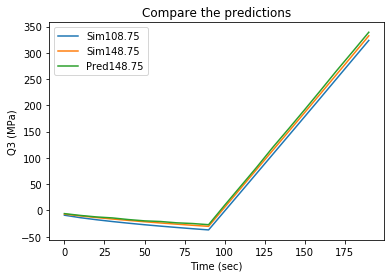

In [34]:

x5=np.array([[series[4],series[5]]])
y5=model.predict(x5)

time=range(0,200,10)

plt.plot(time, series[4],  label='Sim108.75')
#plt.plot(time, y4[0],  label='Pred128.75')  
plt.plot(time, series[5],  label='Sim148.75')
plt.plot(time, y5[0],  label='Pred148.75')
#plt.plot(time, pred168_75[0],  label='Pred168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q3 (MPa)')
plt.title('Compare the predictions')
plt.legend()

plt.show()

#### Lets compare value by value, looks great.

In [35]:
print(y5)
print(series[6])

[[ -6.0156755  -9.501593  -12.348202  -14.218816  -17.347952  -19.812563
  -21.04431   -23.542871  -24.881607  -27.11905     9.830913   45.941246
   82.153336  119.82158   155.56215   191.9085    228.83615   266.30505
  302.515     339.17935  ]]
[ -6.405875  -9.460875 -12.09     -14.43625  -16.5225   -18.46125
 -20.28625  -22.05125  -23.725    -25.33      11.08      47.50875
  83.975    120.5125   157.1375   193.8125   230.4875   267.2625
 304.15     341.1625  ]


#### Training losses

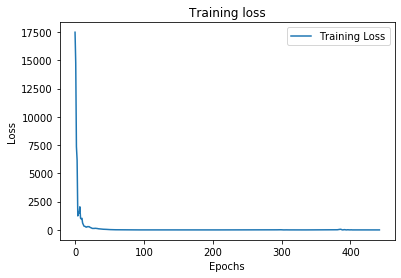

In [36]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs[0:], loss[0:],  label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### Lets continue for the prediction of 8th set, compare the prediction, and observe visualize the last three series in order to see the convergence 

Train on 5 samples
Epoch 1/1000
5/5 [==============================] - 4s 798ms/sample - loss: 17911.2090
Epoch 2/1000
5/5 [==============================] - 0s 4ms/sample - loss: 15976.4160
Epoch 3/1000
5/5 [==============================] - 0s 2ms/sample - loss: 9540.3271
Epoch 4/1000
5/5 [==============================] - 0s 2ms/sample - loss: 4010.0325
Epoch 5/1000
5/5 [==============================] - 0s 1ms/sample - loss: 3053.1196
Epoch 6/1000
5/5 [==============================] - 0s 2ms/sample - loss: 772.9170
Epoch 7/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1177.0842
Epoch 8/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1758.2946
Epoch 9/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1534.1116
Epoch 10/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1246.0979
Epoch 11/1000
5/5 [==============================] - 0s 3ms/sample - loss: 913.0378
Epoch 12/1000
5/5 [==============================] - 

Epoch 100/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.8305
Epoch 101/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.8259
Epoch 102/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.8002
Epoch 103/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7732
Epoch 104/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7535
Epoch 105/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7348
Epoch 106/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7303
Epoch 107/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7283
Epoch 108/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7232
Epoch 109/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7153
Epoch 110/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.7003
Epoch 111/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.6891
Epoc

Epoch 199/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3382
Epoch 200/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3359
Epoch 201/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3336
Epoch 202/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3313
Epoch 203/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3290
Epoch 204/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3267
Epoch 205/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3245
Epoch 206/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3222
Epoch 207/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3201
Epoch 208/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3179
Epoch 209/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3157
Epoch 210/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.3135
Epoc

Epoch 298/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2296
Epoch 299/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2868
Epoch 300/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2915
Epoch 301/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2207
Epoch 302/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2519
Epoch 303/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2684
Epoch 304/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2135
Epoch 305/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2232
Epoch 306/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2454
Epoch 307/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2077
Epoch 308/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2005
Epoch 309/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.2248
Epoc

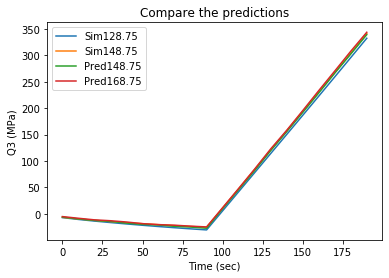

In [39]:
Xtrain2=np.array([[series[0],series[1]],[series[1],series[2]],[series[2],series[3]],[series[3],series[4]],[series[4],series[5]]])
Ytrain2 = np.array([series[2],series[3],series[4],series[5],y5[0]])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<.12   ): #and logs.get('val_loss')<1
      print("\nReached expected accuracy level, so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

#Activation function use na korle model diverge kore
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,activation='relu',  return_sequences=True, input_shape=(2, 20))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='relu')),  #
    tf.keras.layers.Dense(units=20)
])

#model.summary()

adamOptimizer=keras.optimizers.Adam(lr=2.5e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
MSE='mean_squared_error'
model.compile(optimizer=adamOptimizer, loss=MSE)
history = model.fit(Xtrain2, Ytrain2, epochs=1000, callbacks=[callbacks]) #, validation_data=(Xtest, Ytest)

x6=np.array([[series[5],y5[0]]])
y6=model.predict(x6)

time=range(0,200,10)

#plt.plot(time, series[2],  label='68.75')
#plt.plot(time, series[3],  label='88.75')
#plt.plot(time, series[4],  label='108.75')
plt.plot(time, series[5],  label='Sim128.75')  
plt.plot(time, series[6],  label='Sim148.75')
plt.plot(time, y5[0],  label='Pred148.75')
plt.plot(time, y6[0],  label='Pred168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q3 (MPa)')
plt.title('Compare the predictions')
plt.legend()

plt.show()

#### Lets compare the two predicted sets with the simulation results, both curves look great

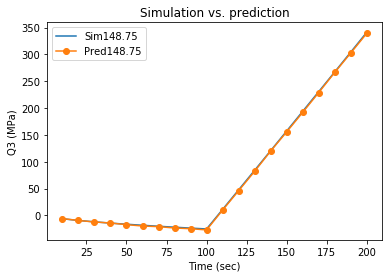

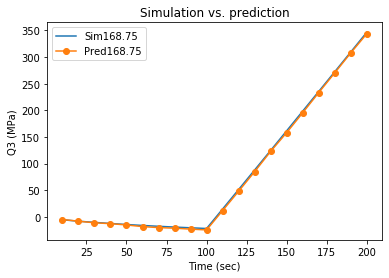

In [10]:

import matplotlib.pyplot as plt

Sim1400g=[-6.405875,  -9.460875, -12.09,     -14.43625,  -16.5225,   -18.46125,
          -20.28625,  -22.05125,  -23.725,    -25.33,      11.08,      47.50875,
          83.975,    120.5125,   157.1375,   193.8125,   230.4875,   267.2625,
          304.15,     341.1625  ]
y5=[-6.0156755,  -9.501593,  -12.348202,  -14.218816,  -17.347952,  -19.812563,
    -21.04431,   -23.542871,  -24.881607,  -27.11905,     9.830913,   45.941246,
    82.153336,  119.82158,   155.56215,   191.9085,    228.83615,   266.30505,
    302.515,     339.17935  ]

Sim2000g=[-5.5450625,  -8.229125,  -10.4423125,  -12.4825,  -14.42125, 
          -16.21,  -17.8025,  -19.25375,  -20.62,  -21.9525, 
          14.655,  51.2775,  87.96,  124.7,  161.5625, 
          198.4625,  235.4,  272.4,  309.4625,  346.5875]
y6=[-5.044805,  -8.21748,  -11.197223, -12.881879, -15.290867, -18.397106,
    -20.231192, -21.359428, -23.123833, -24.601301,  11.717208,  48.046894,
    84.8471,   122.91866,  158.1245,   195.37167,  233.2418,   270.32013,
    307.7743,   343.73486 ]


time=range(10,201,10)
plt.plot(time, Sim1400g, label='Sim148.75')
plt.plot(time, y5, 'o-', label='Pred148.75')
#plt.plot(time, Sim2000g,  label='Sim168.75')
#plt.plot(time, y6, 'o-', label='Pred168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q3 (MPa)')
plt.title('Simulation vs. prediction')
plt.legend()
plt.show()

time=range(10,201,10)
plt.plot(time, Sim2000g,  label='Sim168.75')
plt.plot(time, y6, 'o-', label='Pred168.75')
plt.xlabel('Time (sec)')
plt.ylabel('Q3 (MPa)')
plt.title('Simulation vs. prediction')
plt.legend()
plt.show()

#### In summary we can say that, like Q1 and Q2, training 6 sets of data series as a sequence, we can predict the next serieses of Q3  in the sequence till the convergence.